시계열 데이터 분석 : 기아차 주식을 분석하세요.

1. 2009.01.01~ 2017.12.31일 까지의 시세를 확인하세요.

2. 1.의 기간의 종가(Close)를 기준으로 그래프를 그려 보세요.

3. 1년 후, 2018.12.31일 까지의 정보를 예측해 보세요.

4. 700일 간의 데이터를 예측해 보세요.
실제 데이터와 예측값을 그래프로 그려 보세요.

In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime
import numpy as np

In [0]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
	
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['axes.unicode_minus'] = False
# 그래프에서 마이너스 폰트 깨질 경우 대비

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild() # 이걸 해줘야 plt.rc가 작동

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14.

INFO:matplotlib.font_manager:generated new fontManager


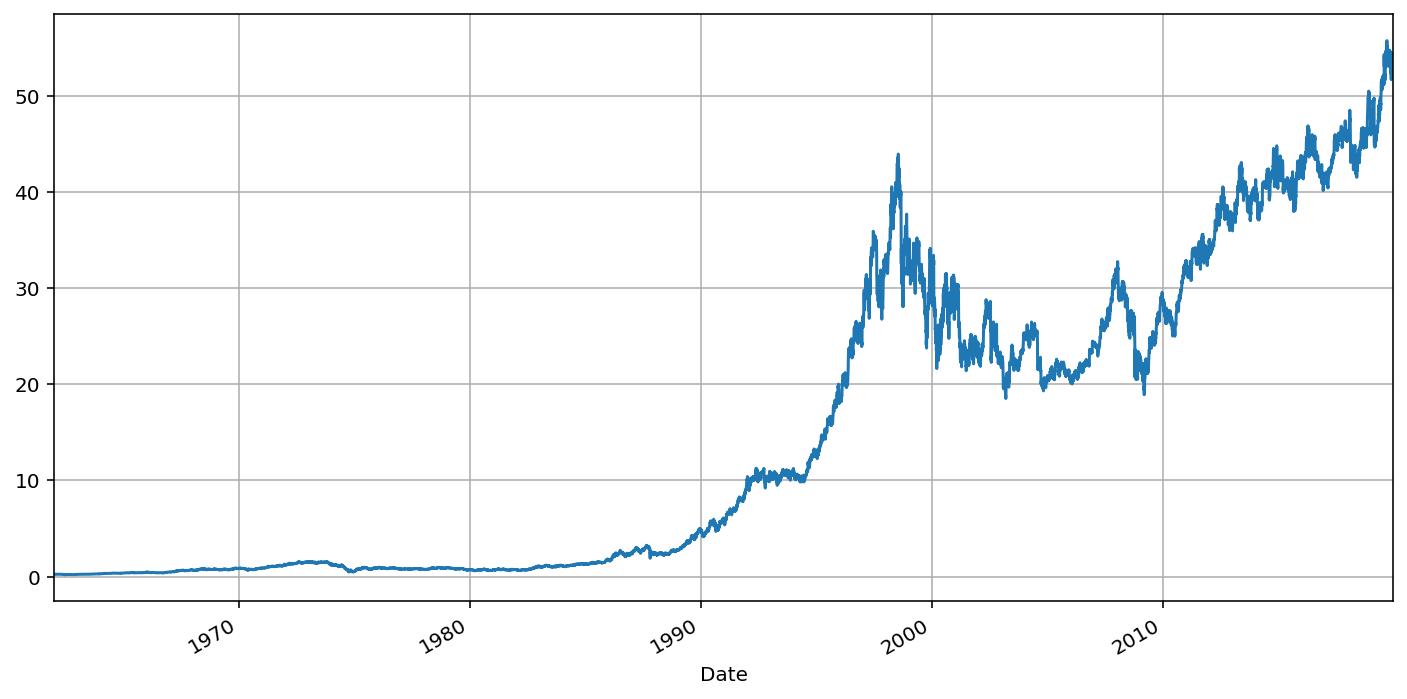

In [45]:
from pandas_datareader import data

start_date = datetime(1962,1,2) 
end_date = datetime(2019,12,16)  # 아싸리 지금현재 시점까지 데이터 불러옮.
KIA = data.get_data_yahoo('KO', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

# 2017년 12월 31일 이전 자료만 갖다 씀.

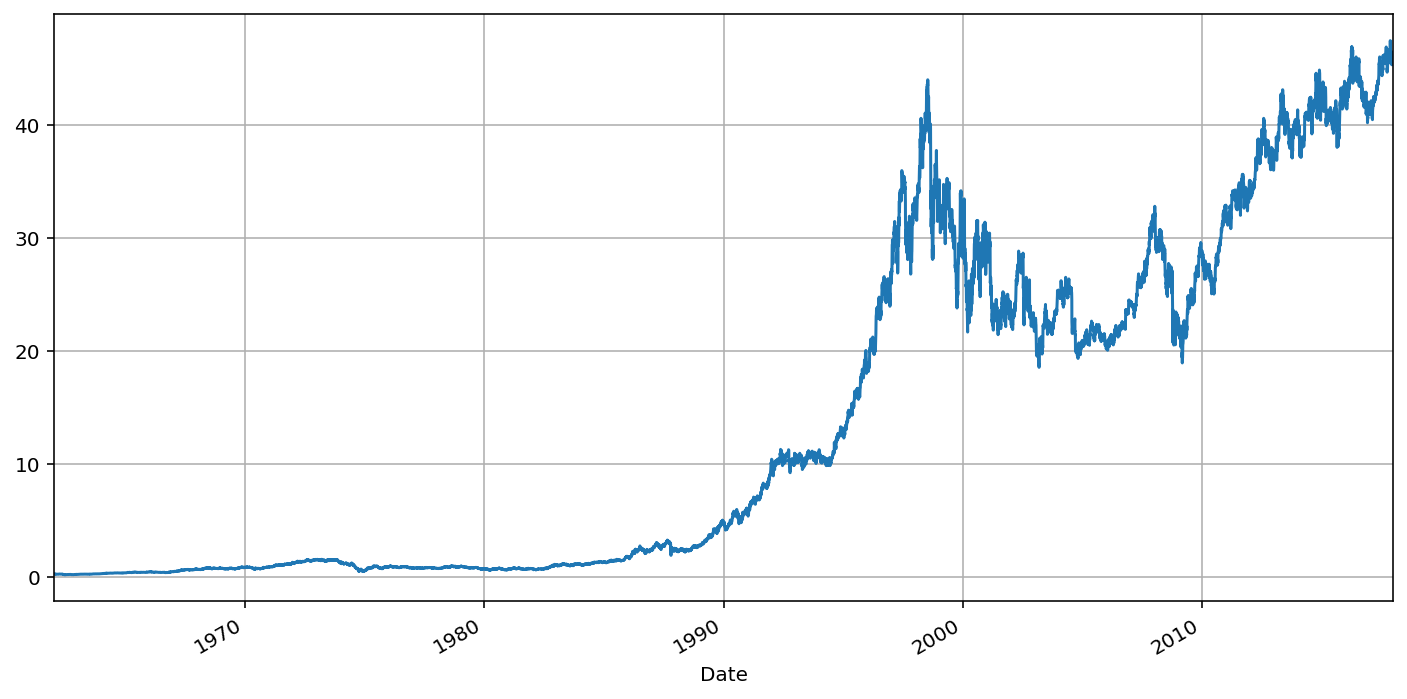

In [46]:
KIA_trunc = KIA[:'2017-12-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True);

In [0]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [0]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [49]:
future = m.make_future_dataframe(periods=365) 
future.tail()

,ds
14457,2018-12-25
14458,2018-12-26
14459,2018-12-27
14460,2018-12-28
14461,2018-12-29


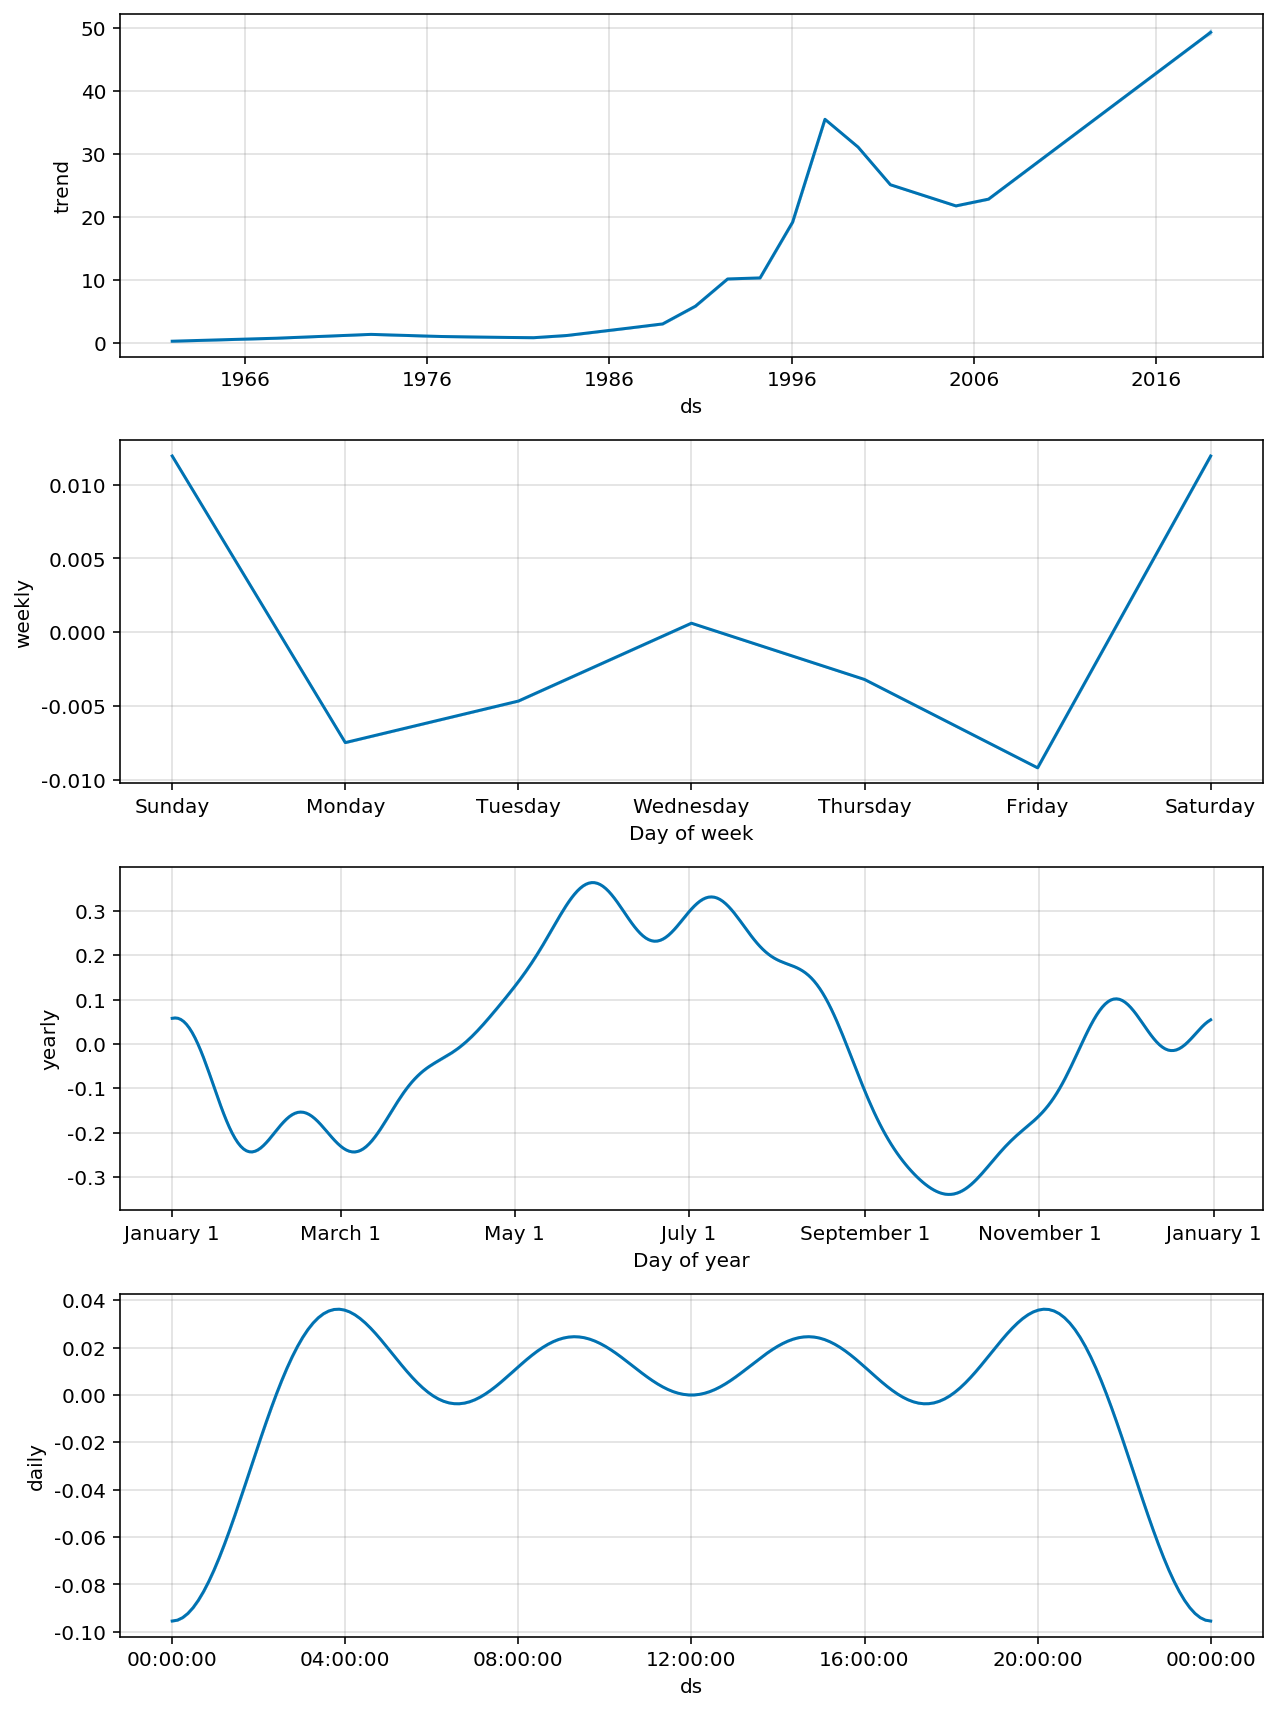

In [50]:
forecast = m.predict(future)
m.plot_components(forecast);

# 365일치 예상 그래프

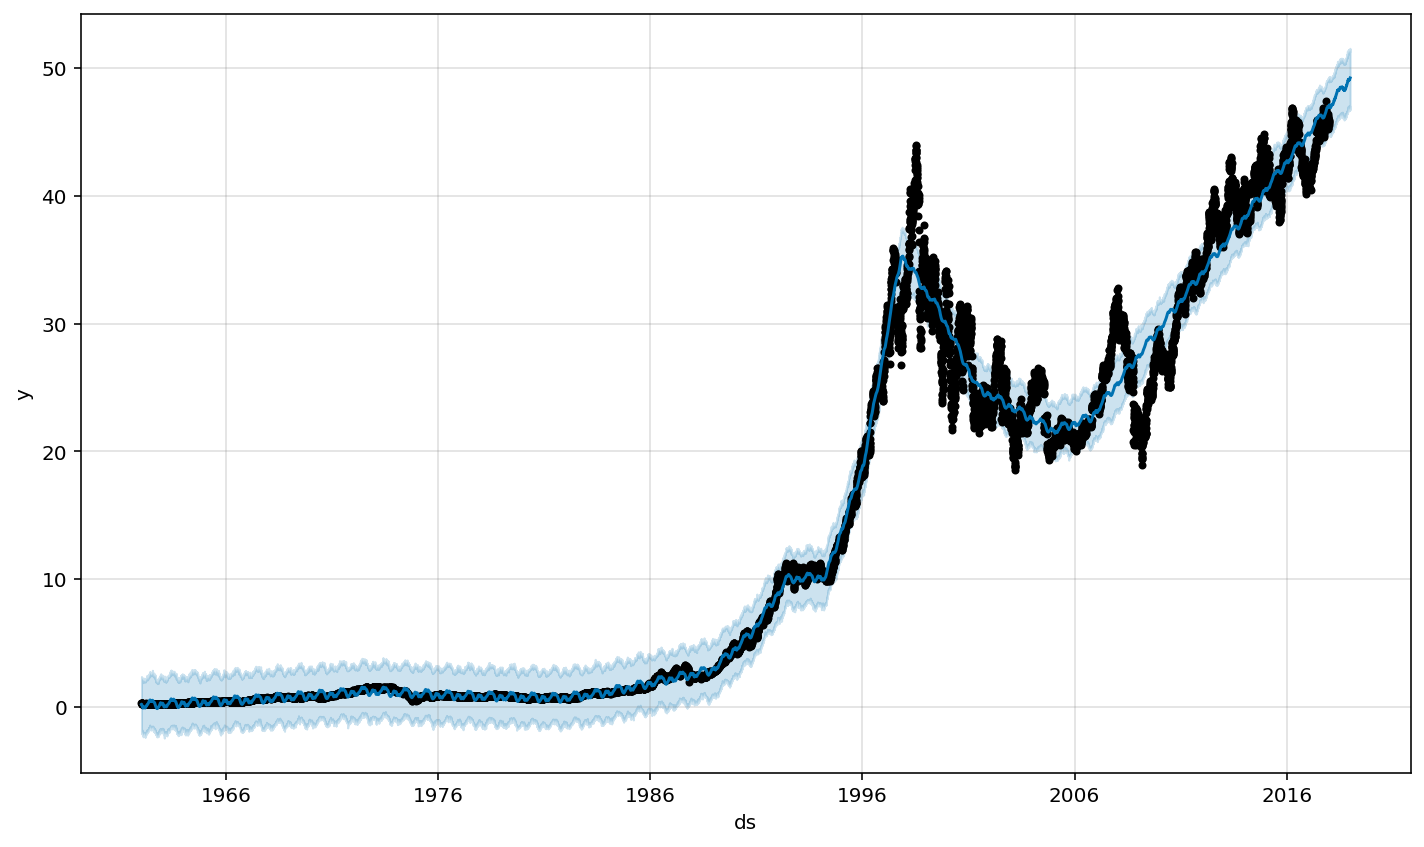

In [51]:
forecast = m.predict(future)
m.plot(forecast);

# 700일치 예상 그래프

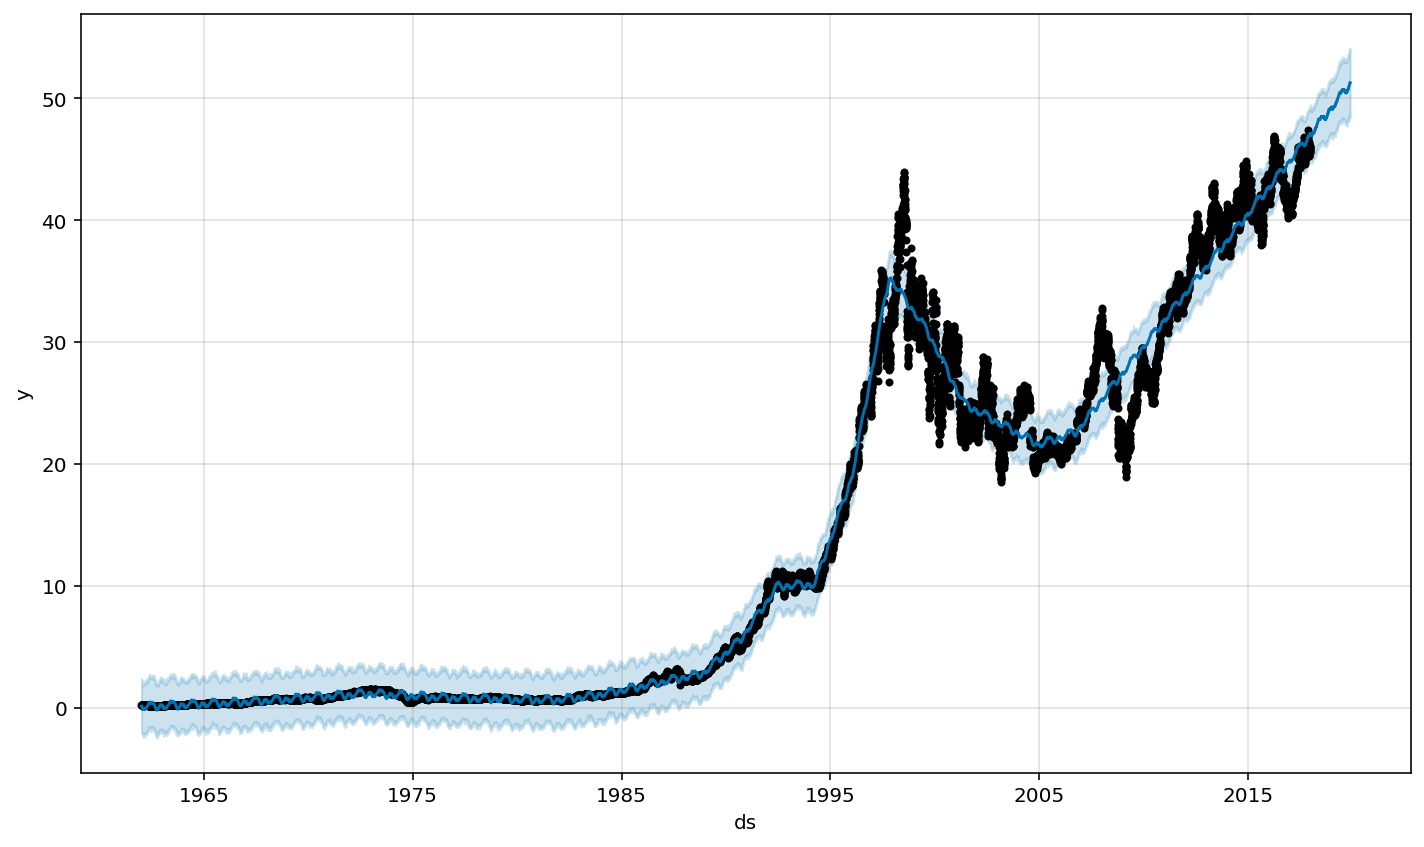

In [52]:
future2 = m.make_future_dataframe(periods=700) 
future2.tail()
forecast2 = m.predict(future2)
m.plot(forecast2);

# 1년치 예상 그래프와 실제 데이터 비교

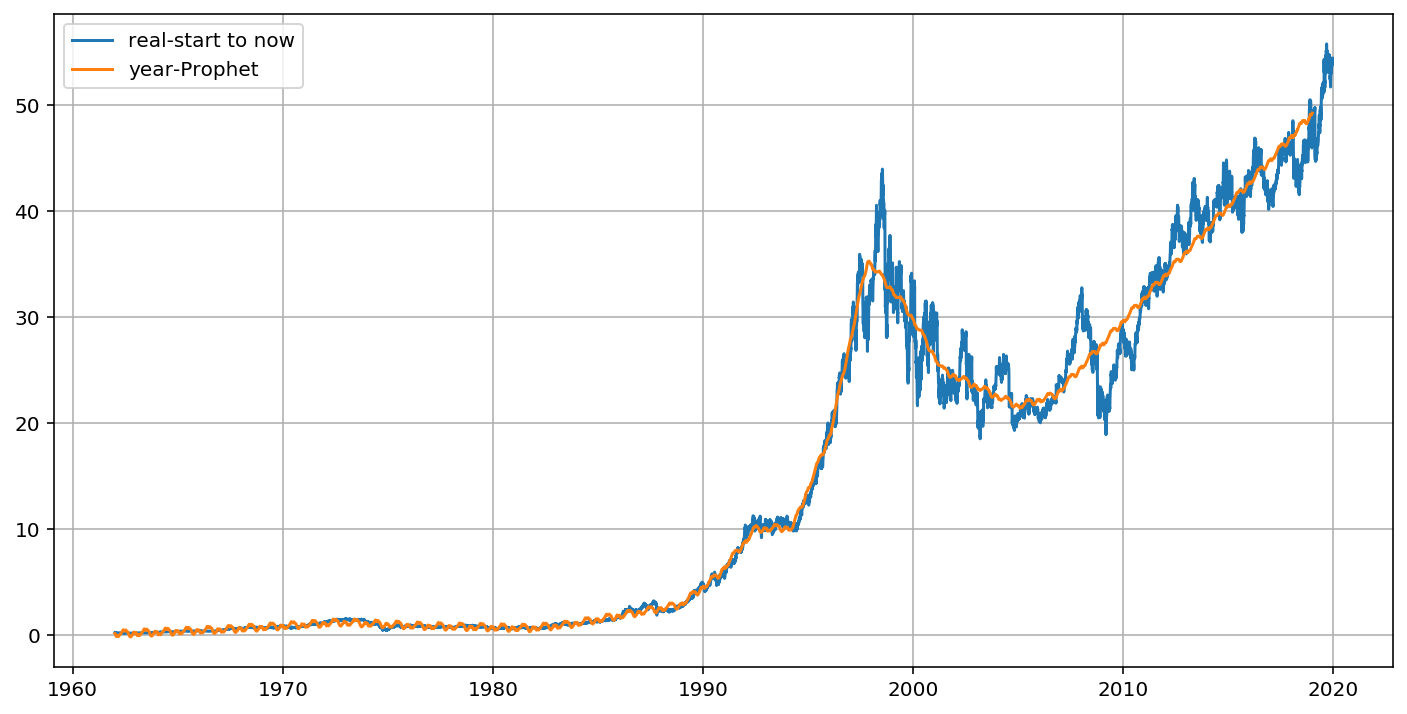

In [53]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real-start to now')
plt.plot(forecast['ds'], forecast['yhat'], label='year-Prophet')
plt.grid()
plt.legend()
plt.show()

# 700일치 예상 그래프와 실제 데이터 비교

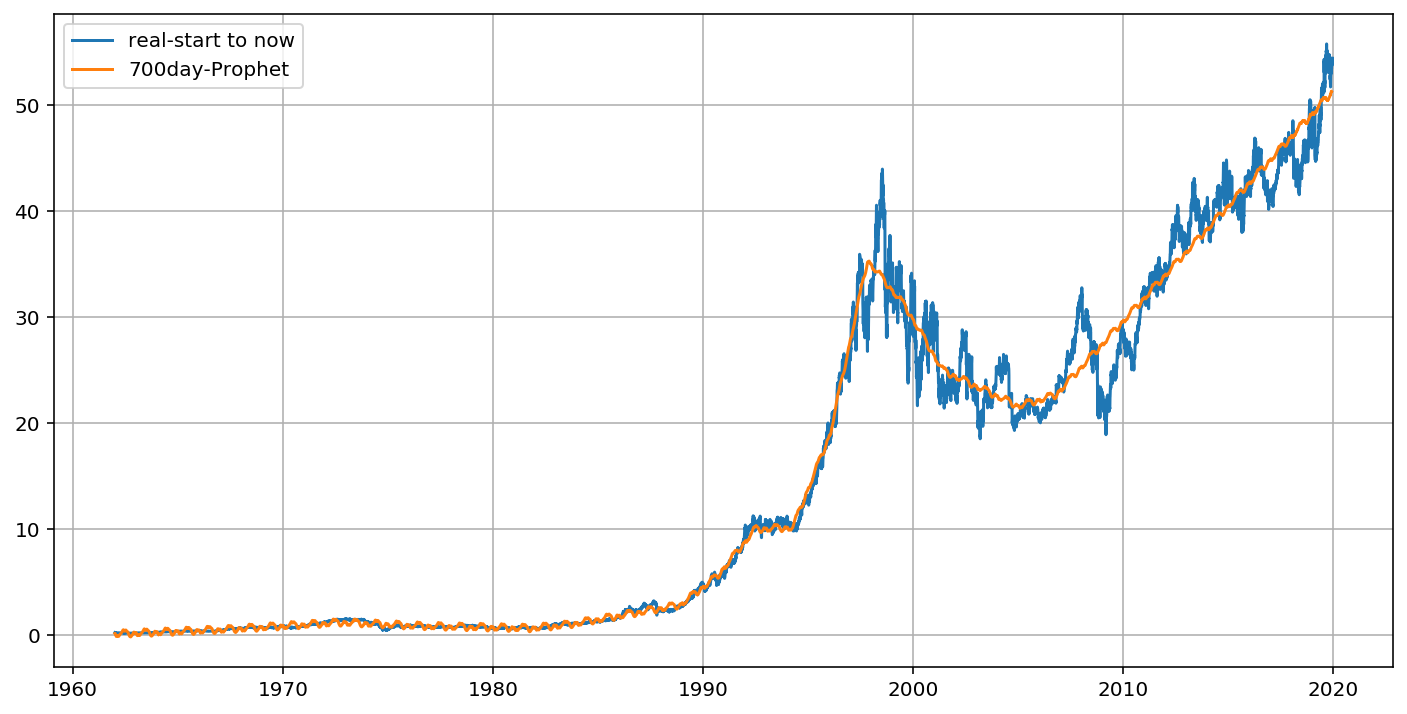

In [54]:
plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label='real-start to now')
plt.plot(forecast2['ds'], forecast2['yhat'], label='700day-Prophet')
plt.grid()
plt.legend()
plt.show()